In [1]:
import scanpy as sc

In [2]:
adata=sc.read("data/adata_tree.h5ad")

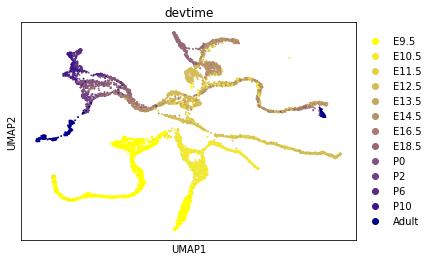

In [3]:
sc.pl.umap(adata,color="devtime")

In [4]:
import numpy as np

In [5]:
import scFates as scf

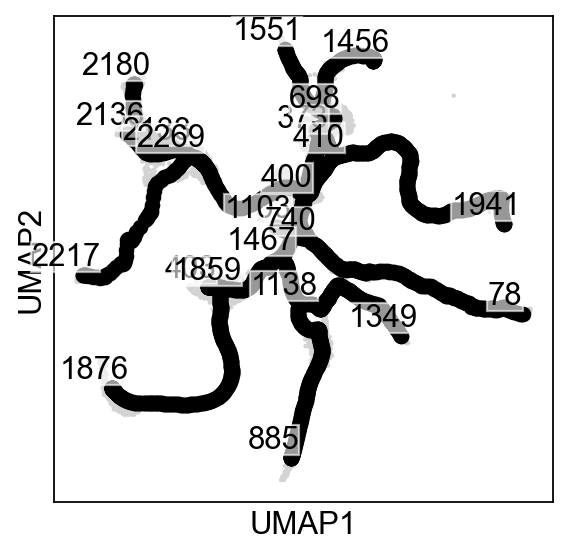

In [6]:
sc.set_figure_params()
scf.pl.graph(adata)

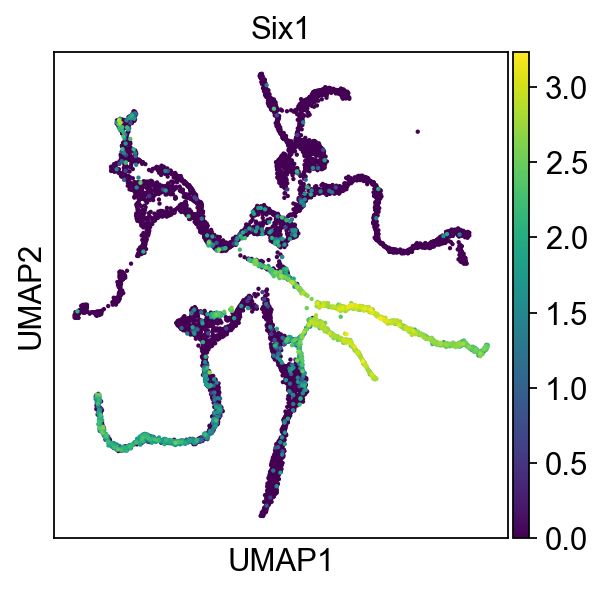

In [7]:
sc.pl.umap(adata,color="Six1")

In [8]:
#scf.tl.test_association(adata,n_jobs=40,root="NCC1",leaves=["nmSC<>mSC"])
#adata.var.to_csv("data/stat_assoc_cranialNCC->nmSC<>mSC.csv")

In [9]:
adata_scenic=sc.read("data/adata_scenic.h5ad")

In [10]:
adata_scenic=adata_scenic[adata.obs_names]
adata_scenic.uns=adata.uns
adata_scenic.obsm=adata.obsm
adata_scenic.obs=adata.obs

In [11]:
adata=adata_scenic

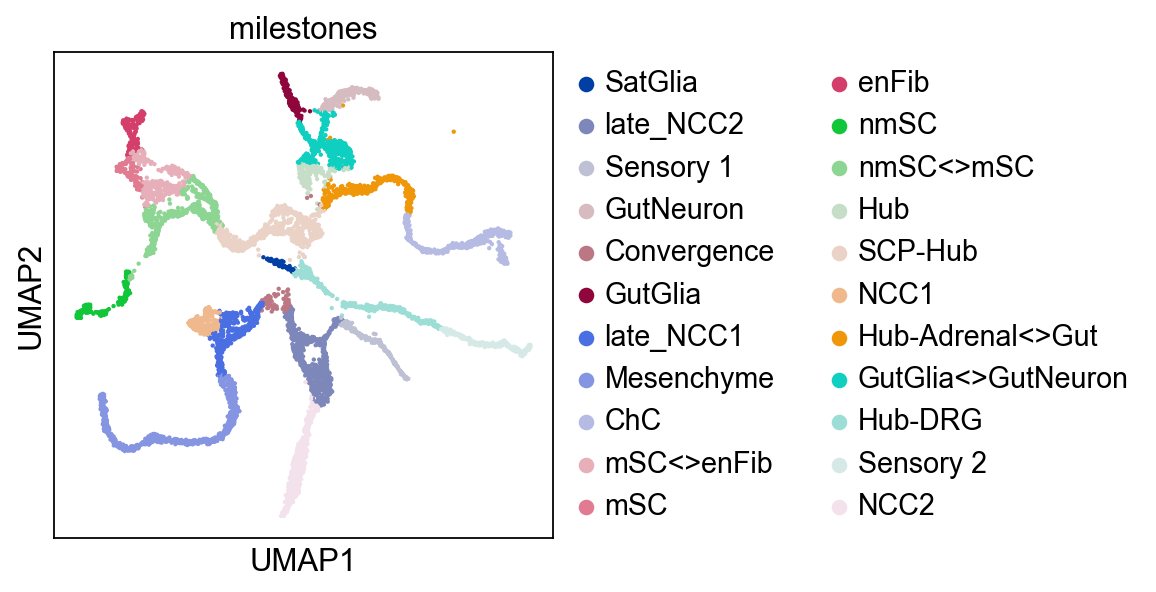

In [12]:
sc.pl.umap(adata,color="milestones")

In [13]:
scf.tl.subset_tree(adata,root_milestone="NCC1",milestones=["nmSC<>mSC","SatGlia","Sensory 2"])

subsetting tree
node 240 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


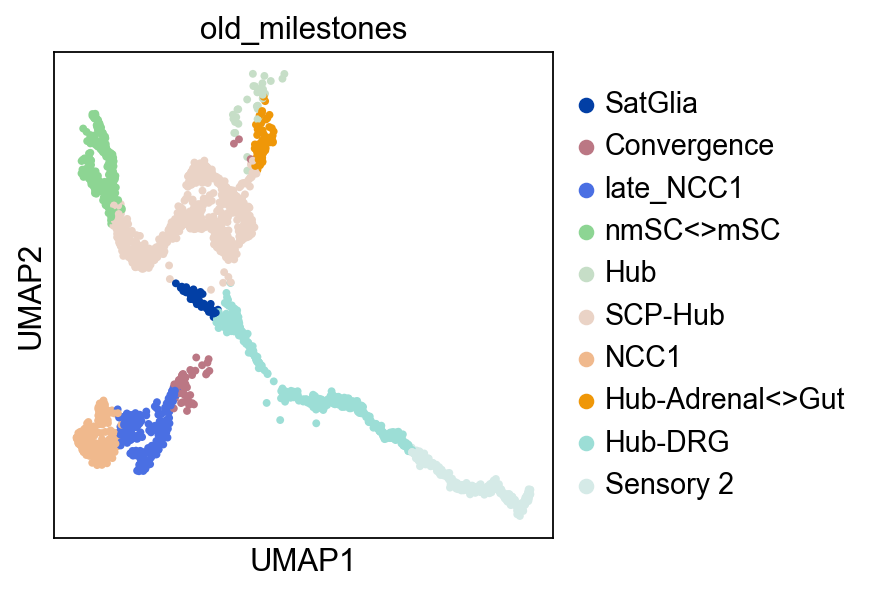

In [14]:
sc.pl.umap(adata,color="old_milestones")

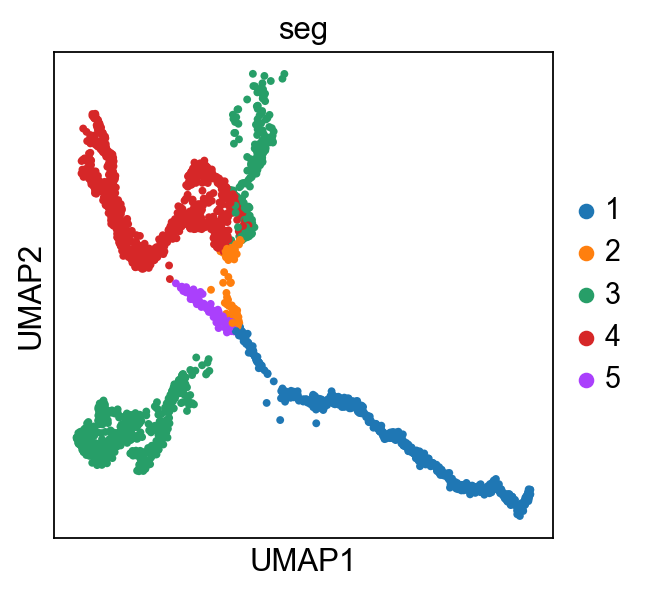

In [15]:
sc.pl.umap(adata,color="seg")

In [16]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]
    finished (0:00:04) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


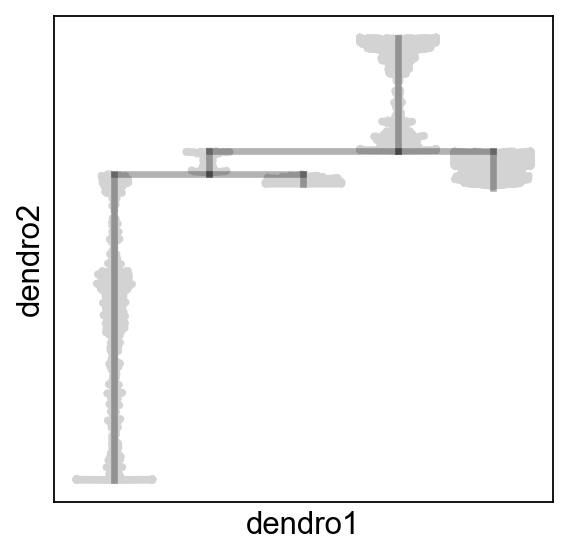

In [17]:
scf.pl.dendrogram(adata)

In [18]:
max_t=adata[adata.obs.seg.isin(["4","5"])].obs.t.max()

In [19]:
scf.tl.subset_tree(adata,t_max=max_t)

subsetting tree
node 148 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree subsetted


In [20]:
scf.tl.extend_tips(adata,restrict_seg=True)

extending tree
    finished (0:00:00) --> tips extended


In [21]:
adata.obsm["X_R"]

array([[3.58171666e-09, 2.95437073e-03, 3.19329325e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76784329e-09, 3.46645705e-03, 3.33797520e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.38992687e-11, 6.64040935e-05, 9.96043902e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.01161176e-10, 7.91711281e-05, 3.34113682e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01397766e-11, 8.09020798e-06, 7.47598981e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.89543327e-11, 2.88298954e-05, 7.19897543e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

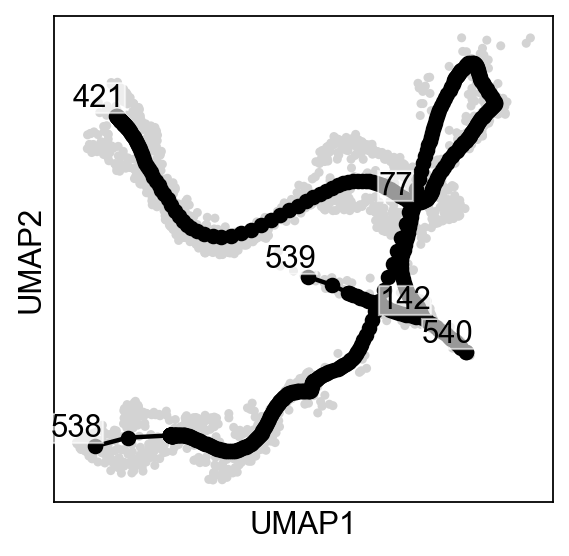

In [22]:
scf.pl.graph(adata)

In [23]:
scf.tl.root(adata,538)
scf.tl.pseudotime(adata)

node 538 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [24]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]
    finished (0:00:01) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


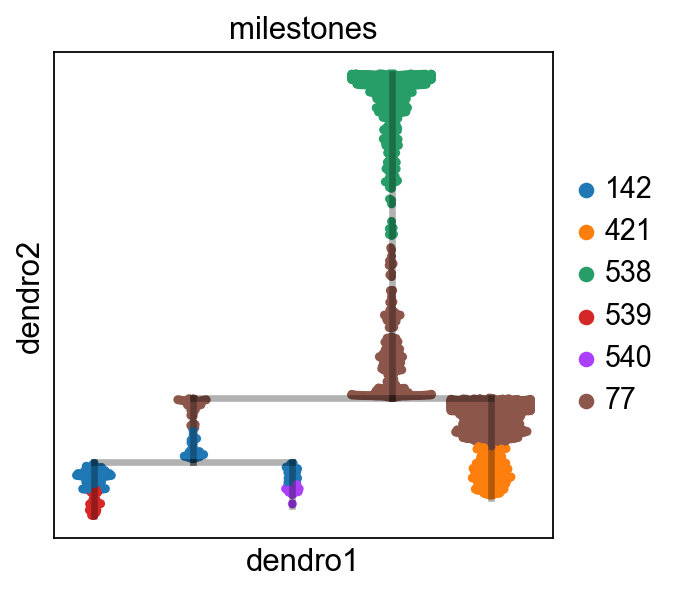

In [25]:
scf.pl.dendrogram(adata,color="milestones")

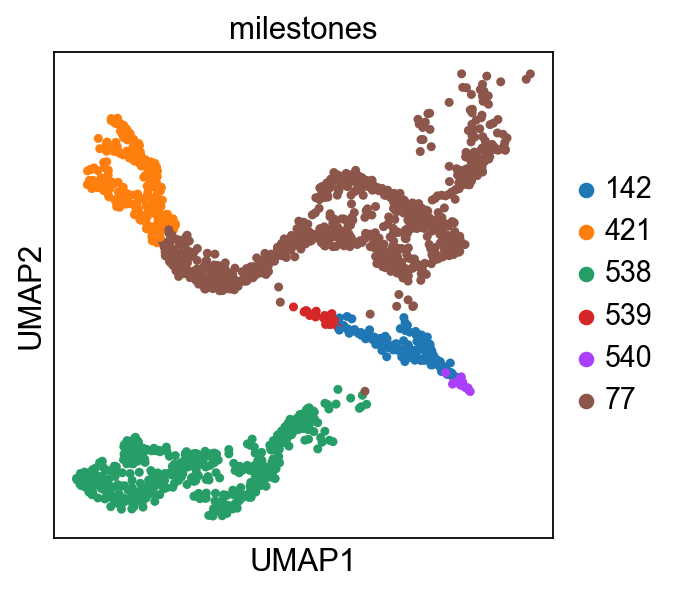

In [26]:
sc.pl.umap(adata,color="milestones")

In [27]:
adata.uns["graph"]["tips"].astype(str)

array(['421', '538', '539', '540'], dtype='<U21')

In [28]:
import pandas as pd
assign=dict(zip(adata.uns["graph"]["tips"].astype(str),
         ["imSC","NCC","SatGlia","Sensory 2"]))

assign=pd.Series(assign)

ordered=adata.uns["graph"]["pp_info"].loc[adata.uns["graph"]["forks"]].sort_values("time").index.astype(str)

import string
ordered=pd.Series([string.ascii_uppercase[i] for i in range(len(ordered))],
          index=ordered)

newmil=pd.concat([assign,ordered]).loc[adata.obs.milestones.cat.categories].tolist()

scf.tl.rename_milestones(adata,newmil)

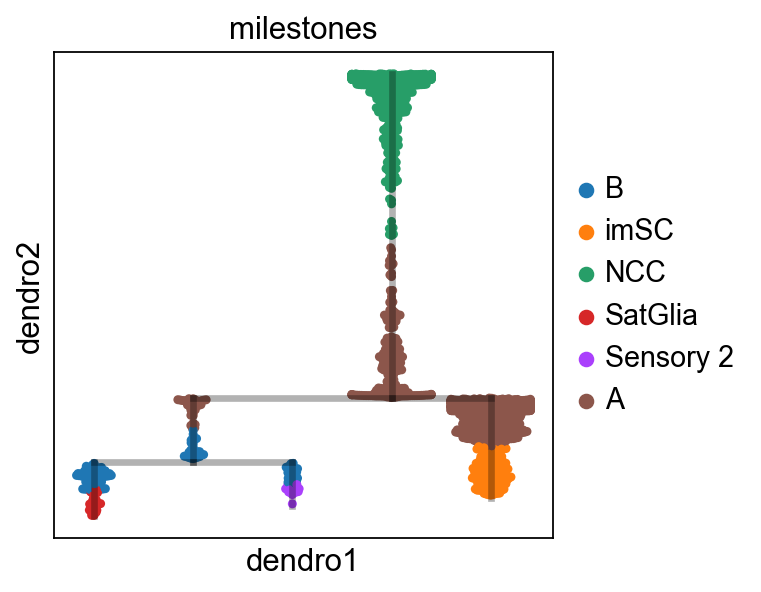

In [29]:
scf.pl.dendrogram(adata,color="milestones")

In [30]:
scf.tl.test_association(adata,n_jobs=20,A_cut=0.015)

test features for association with the trajectory
    single mapping : 100%|██████████| 600/600 [00:23<00:00, 25.81it/s]
    found 266 significant features (0:00:23) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [31]:
scf.tl.fit(adata,n_jobs=20,gamma=5)

fit features associated with the trajectory
    finished (adata subsetted to keep only fitted features!) (0:00:05) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


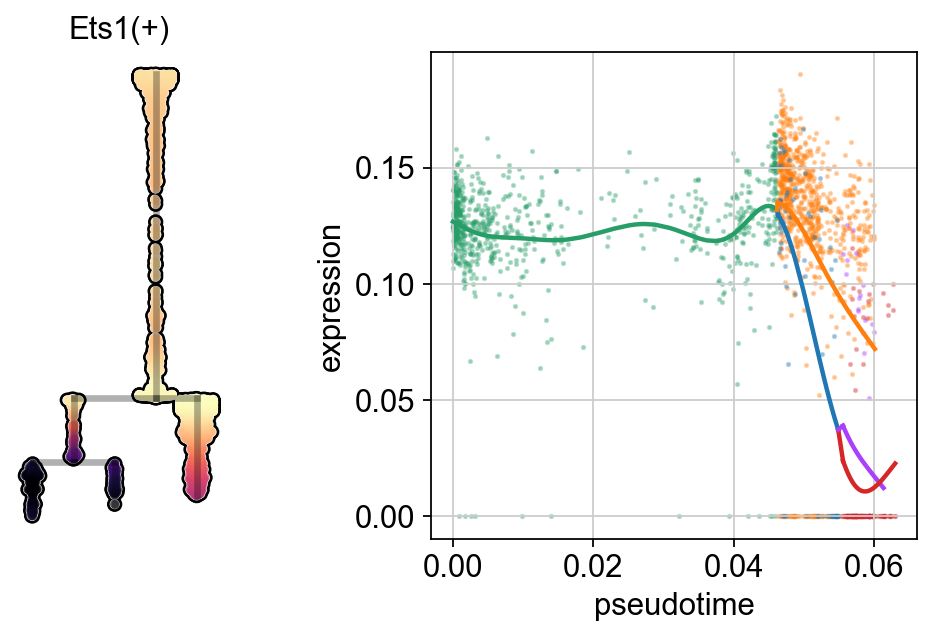

In [32]:
sc.set_figure_params(figsize=(1,3))
scf.pl.single_trend(adata,"Ets1(+)",basis="dendro",cmap_cells="magma",
                    frameon=False,add_outline=True)

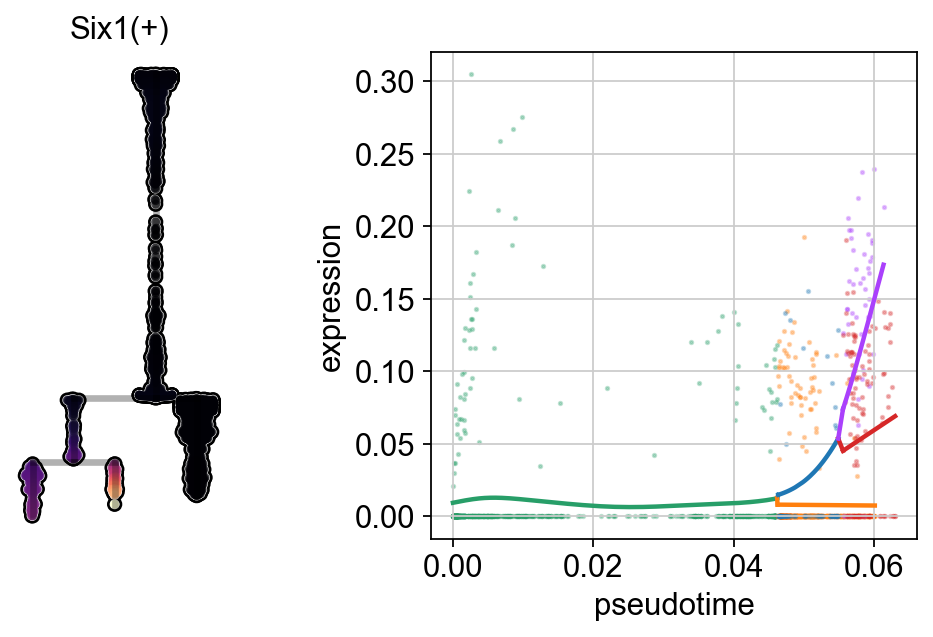

In [33]:
scf.pl.single_trend(adata,"Six1(+)",basis="dendro",cmap_cells="magma",
                    frameon=False,add_outline=True)

In [34]:
#scf.pl.trends(adata,plot_emb=False,show_milsetones=False,colormap="magma",filter_complex=False,ordering="max",ord_thre=0.9)

In [35]:
scf.tl.subset_tree(adata,root_milestone="NCC",milestones=["imSC"])

subsetting tree
node 459 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [36]:
scf.tl.pseudotime(adata,n_map=100,n_jobs=80)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:38<00:00,  2.62it/s]
    finished (0:00:38) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [38]:
scf.tl.test_association(adata,n_jobs=80,n_map=100,A_cut=0.02)

test features for association with the trajectory
    multi mapping : 100%|██████████| 100/100 [02:42<00:00,  1.62s/it]
    found 189 significant features (0:02:42) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [39]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    finished (adata subsetted to keep only fitted features!) (0:00:24) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [40]:
adata

AnnData object with n_obs × n_vars = 1580 × 189
    obs: 'plates', 'devtime', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'doublet_scores', 'leiden', 'CytoTRACE', 't', 'seg', 'edge', 'old_milestones', 'milestones', 't_sd'
    var: 'n_cells', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'devtime_colors', 'graph', 'leiden', 'leiden_colors', 'leiden_sizes', 'location_colors', 'log1p', 'milestones_colors', 'neighbors', 'paga', 'ppt', 'pseudotime_list', 'umap', 'old_milestones_colors', 'old_milestons_colors', 'dendro_segments', 'stat_assoc_list'
    obsm: 'X_R', 'X_diff', 'X_pca', 'X_umap', 'X_dendro'
    layers: 'auc_init', 'weigths', 'fitted'
    obsp: 'connectivities', 'distances'

In [45]:
scf.tl.cluster(adata,knn=30,device="gpu",metric="cosine")

    clustering using grapheno
Finding 30 nearest neighbors using cosine metric and brute algorithm...
Neighbors computed in 0.23934245109558105 seconds...
Computing Jaccard similarity...
jaccard graph constructed in 0.0050737857818603516 seconds...
Running Louvain modularity optimization...
grapheno completed in 0.31670618057250977 seconds...
Communities detected: 5
Modularity: 0.6007485389709473
    finished (0:00:32) --> added
    .obsp['similarity'], pairwise similarity graph.
    .var['fit_clusters'], cluster assignments for features.
    .uns['fit_clusters'], parameters and modularity of the clustering.


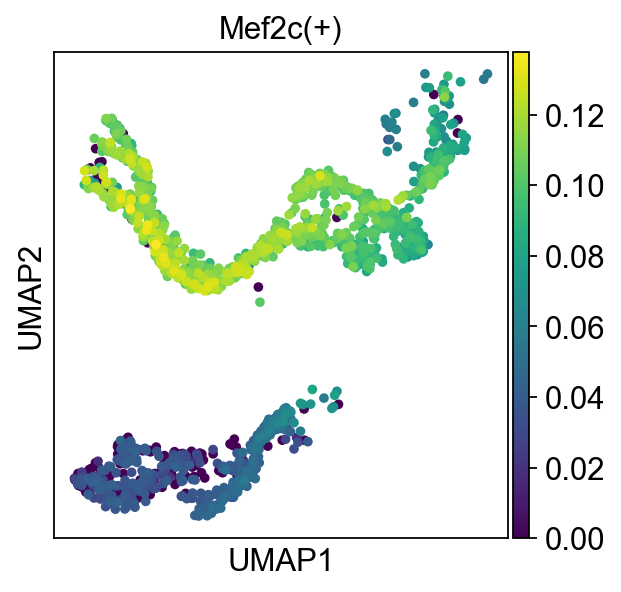

In [55]:
sc.set_figure_params()
sc.pl.umap(adata,color="Mef2c(+)")

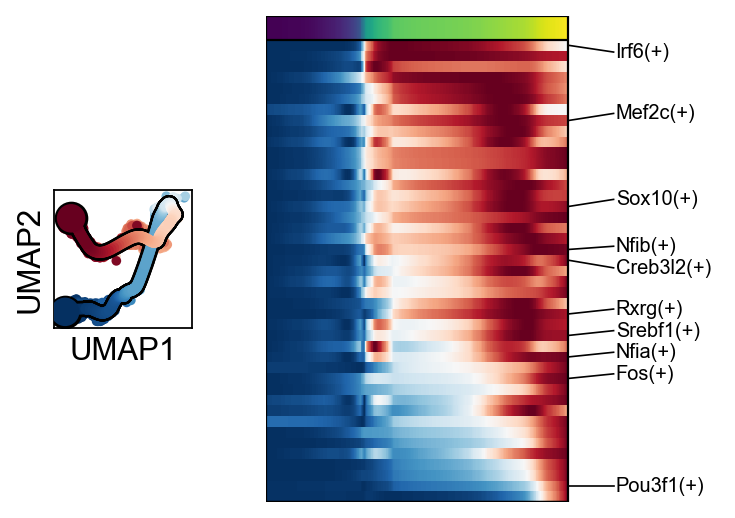

In [46]:
scf.pl.trends(adata,cluster=0)

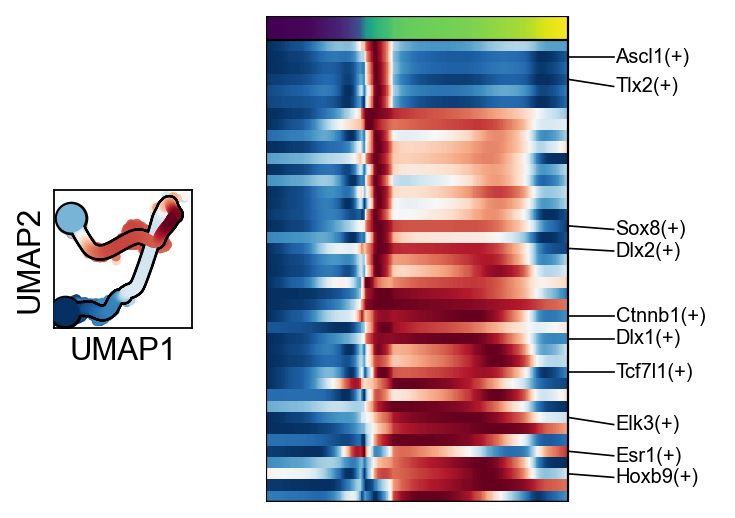

In [47]:
scf.pl.trends(adata,cluster=1)

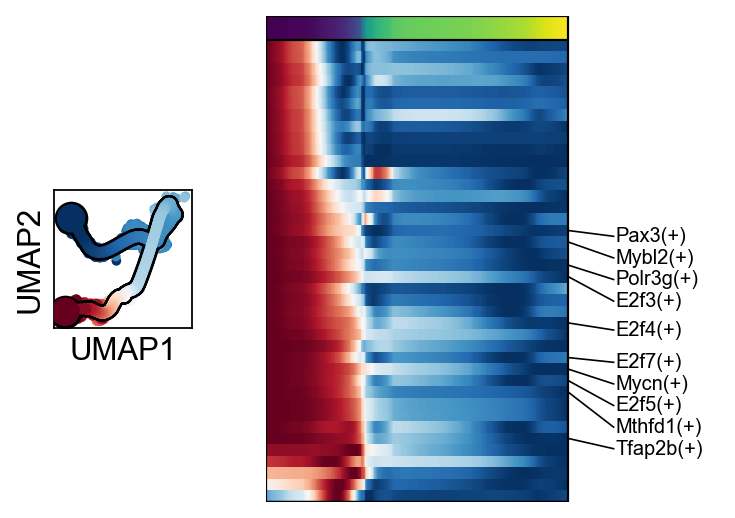

In [48]:
scf.pl.trends(adata,cluster=2)

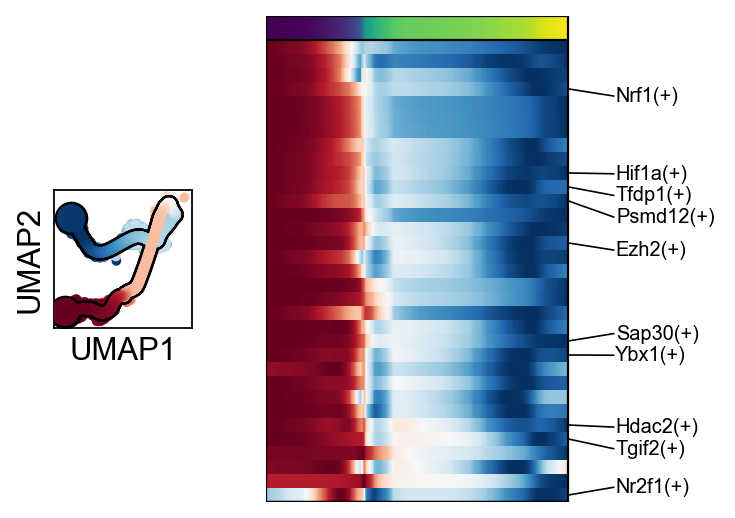

In [49]:
scf.pl.trends(adata,cluster=3)

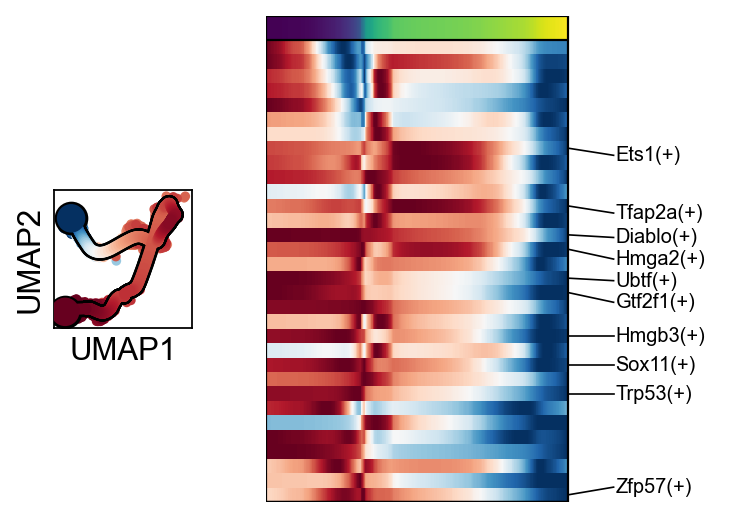

In [50]:
scf.pl.trends(adata,cluster=4)

In [51]:
adata_tree=sc.read("data/adata_tree.h5ad")[adata.obs_names]

In [52]:
adata.obs["old_milestones"]=adata_tree.obs["milestones"]

In [53]:
adata.write("data/adata_SCtraj_scenic_carnial.h5ad")

In [6]:
adata=sc.read("data/adata_tree.h5ad")
r="NCC2"
mils=["Sensory 1","Hub"]
scf.tl.subset_tree(adata,r,mils)

subsetting tree
node 254 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


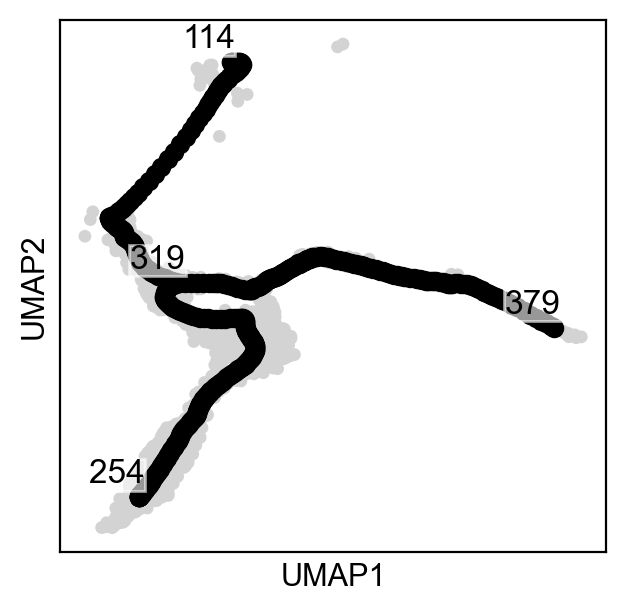

In [7]:
scf.pl.graph(adata)

In [8]:
scf.tl.dendrogram(adata,crowdedness=.01)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00, 14.55it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


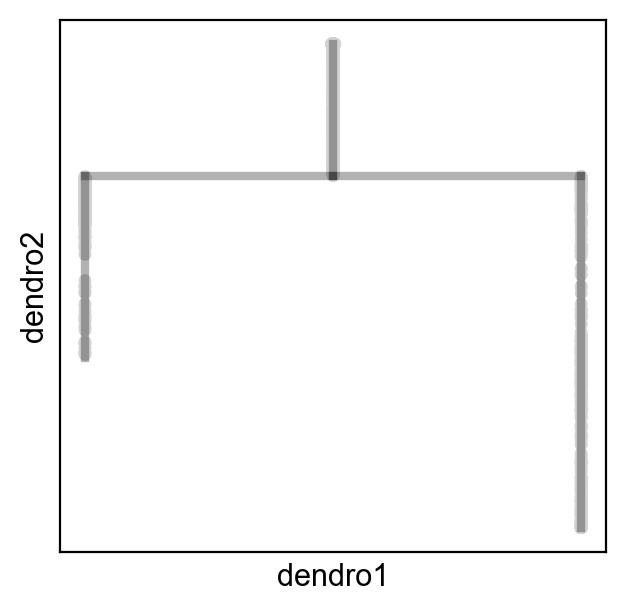

In [9]:
scf.pl.dendrogram(adata)

In [10]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [01:40<00:00, 215.87it/s]
    found 1735 significant features (0:01:40) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [11]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 1735/1735 [00:13<00:00, 125.66it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:15) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


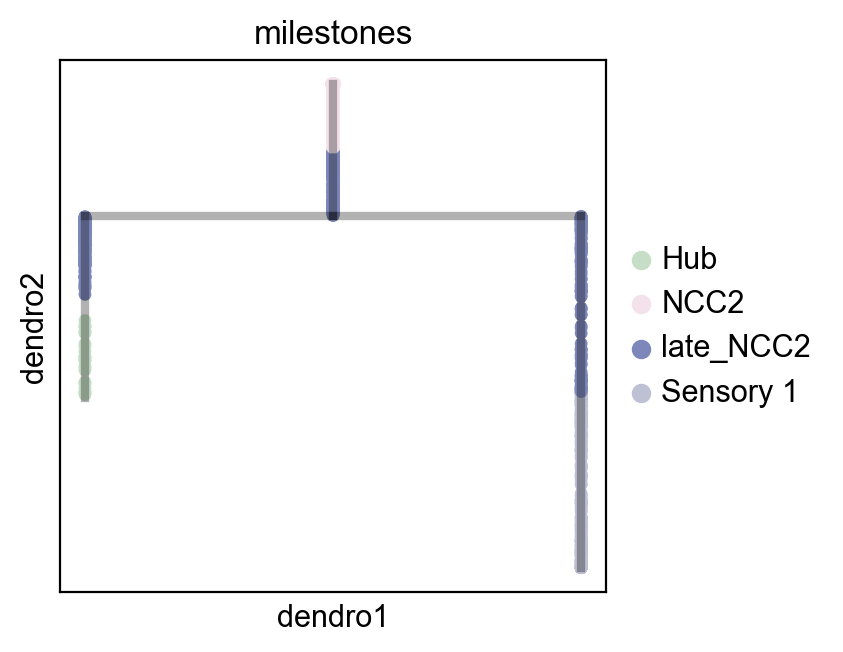

In [12]:
scf.pl.dendrogram(adata,color="milestones")

In [13]:
scf.tl.test_fork(adata,r,mils,n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 1735/1735 [00:24<00:00, 71.57it/s]
    test for upregulation for each leave vs root
    upreg Hub: 100%|██████████| 906/906 [00:01<00:00, 477.88it/s]
    finished (0:00:27) --> added 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame with fork test results.


In [14]:
scf.tl.branch_specific(adata,r,mils,effect=.1)

    branch specific features: Sensory 1: 434, Hub: 148
    finished --> updated 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame updated with additionnal 'branch' column.


In [15]:
scf.tl.activation(adata,r,mils,deriv_cut=.2,n_jobs=20)

testing activation
    to Hub: 100%|██████████| 148/148 [00:01<00:00, 99.21it/s]
    threshold pseudotime is: 0.02056029950443417
    63 early and 371 late features specific to leave Sensory 1
    67 early and 81 late features specific to leave Hub
    finished (0:00:06) --> updated 
    .uns['NCC2->Sensory 1<>Hub']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [16]:
adata.write("data/adata_bif_sensory1.h5ad")

In [25]:
adata=sc.read("data/adata_tree.h5ad")
r="NCC2"
mils=["Sensory 2","SatGlia"]
scf.tl.subset_tree(adata,r,mils)

subsetting tree
node 366 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:02) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [27]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [02:39<00:00, 135.55it/s]
    found 3948 significant features (0:02:40) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [28]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3948/3948 [01:01<00:00, 63.77it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:06) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [29]:
scf.tl.test_fork(adata,r,mils,n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 3948/3948 [00:35<00:00, 110.64it/s]
    test for upregulation for each leave vs root
    upreg SatGlia: 100%|██████████| 1903/1903 [00:01<00:00, 1332.85it/s]
    finished (0:00:40) --> added 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame with fork test results.


In [30]:
scf.tl.branch_specific(adata,r,mils,effect=1)

    branch specific features: Sensory 2: 263, SatGlia: 214
    finished --> updated 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame updated with additionnal 'branch' column.


In [31]:
scf.tl.activation(adata,r,mils,deriv_cut=.2,pseudotime_offset=.02,n_jobs=20,)

testing activation
    to SatGlia: 100%|██████████| 214/214 [00:02<00:00, 77.82it/s]
    threshold pseudotime is: 0.05104037303280258
    17 early and 246 late features specific to leave Sensory 2
    76 early and 138 late features specific to leave SatGlia
    finished (0:00:07) --> updated 
    .uns['NCC2->Sensory 2<>SatGlia']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [32]:
scf.tl.dendrogram(adata,crowdedness=.01)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]
    finished (0:00:00) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


In [33]:
adata.write("data/adata_bif_sensory2.h5ad")

In [47]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm, colors

tab_10 = list(map(colors.to_hex, cm.tab10.colors))

tabs=list(map(lambda t: LinearSegmentedColormap.from_list(name="tab",colors=["white",t]),tab_10))

dct_cmap=dict(zip(adata.var.fit_clusters.unique(),tabs))
dct_col=dict(zip(adata.var.fit_clusters.unique(),tab_10))

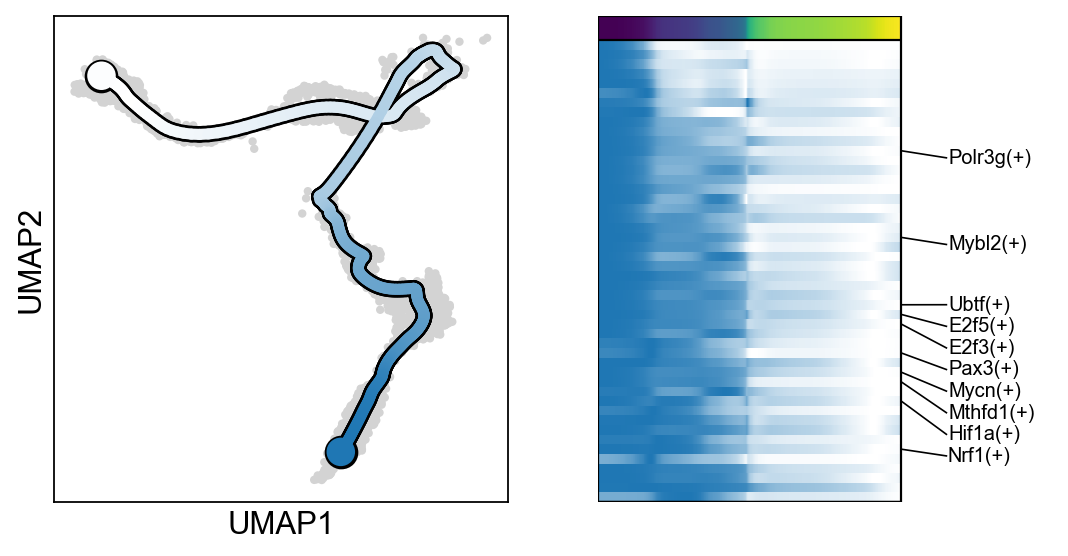

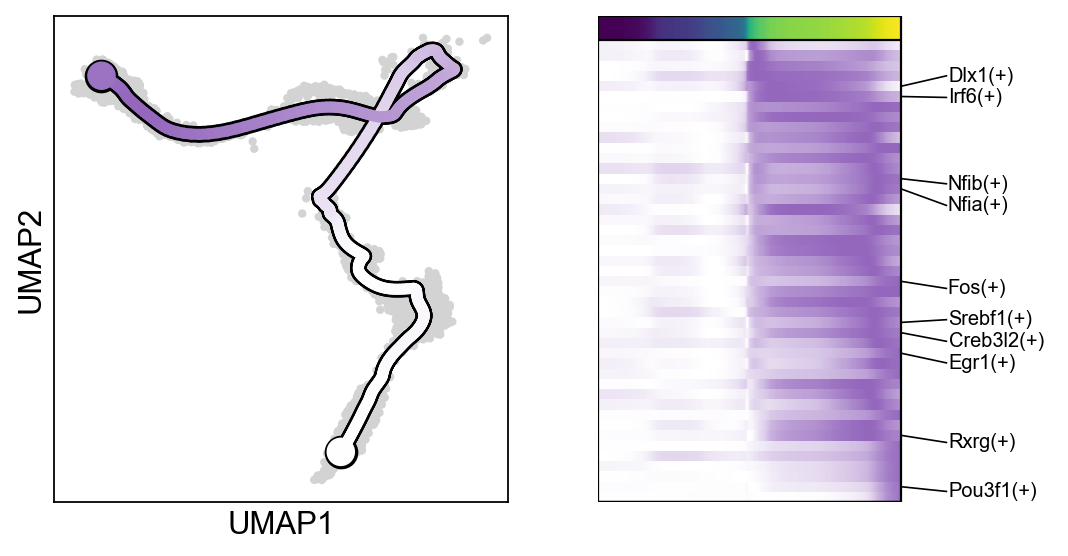

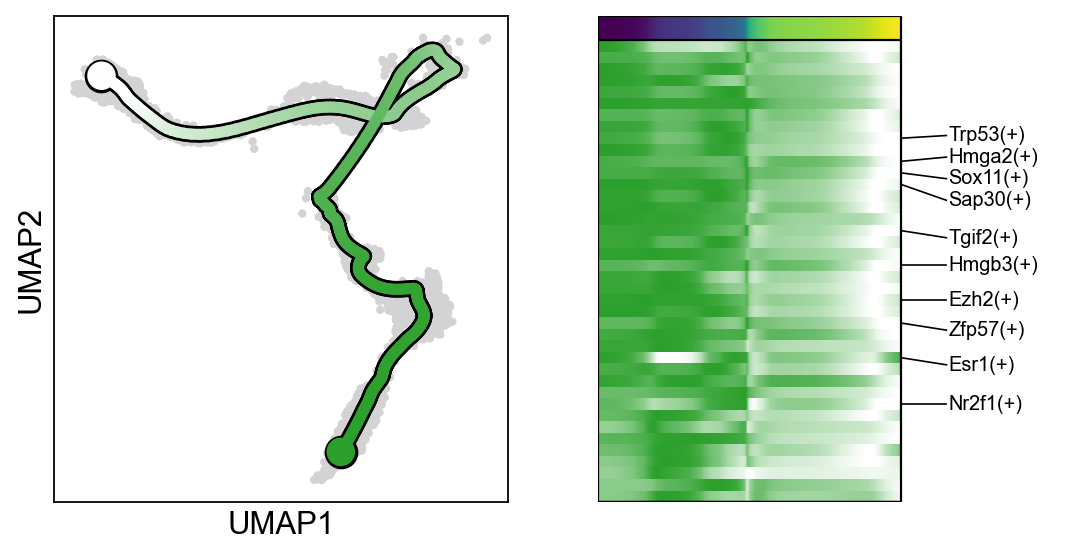

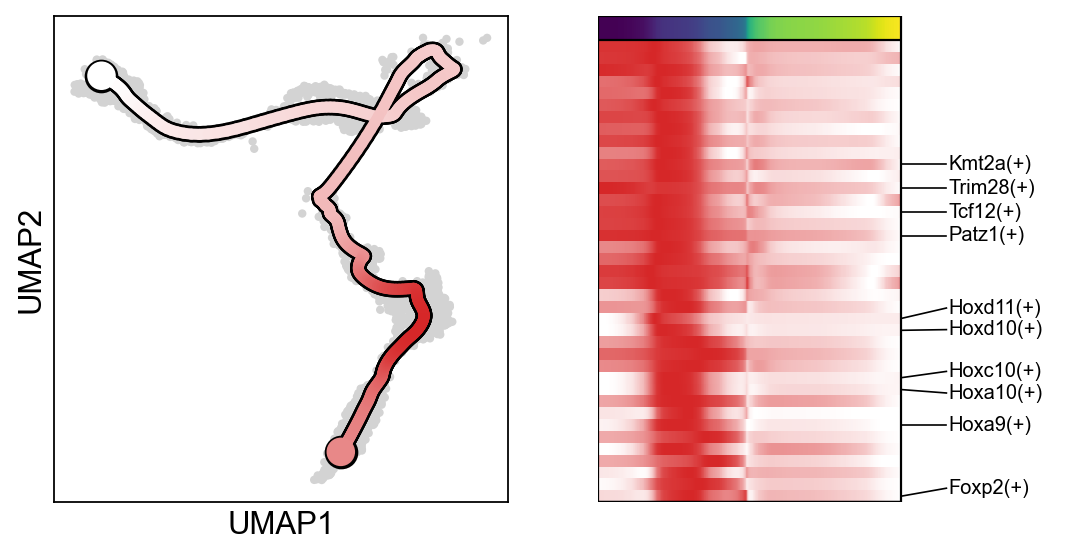

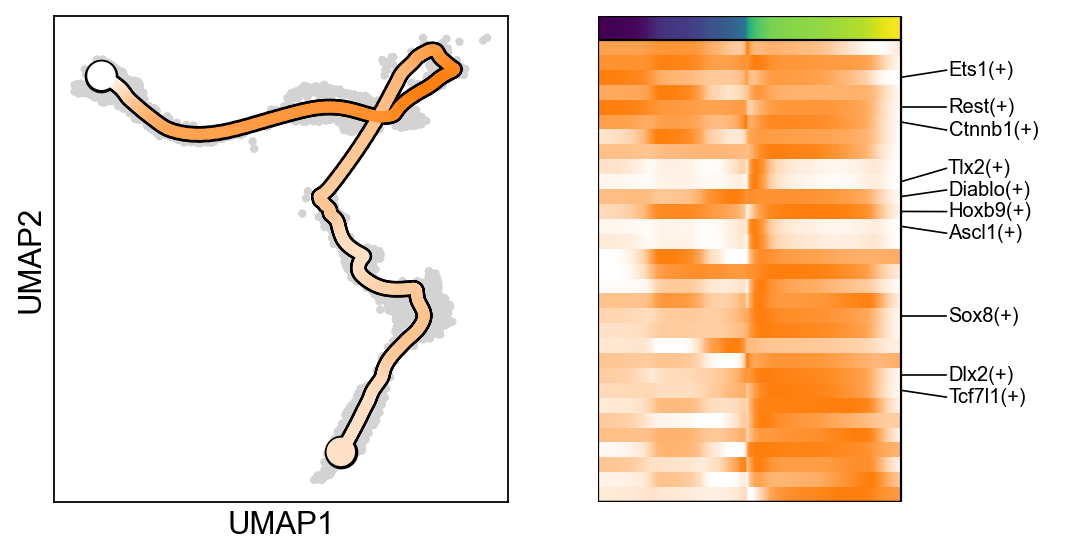

In [48]:
sc.set_figure_params()
scf.set_figure_pubready()
for c in range(5):
    scf.pl.trends(adata,cluster=c,
                  cmap=dct_cmap[c],
                  feature_cmap=dct_cmap[c])

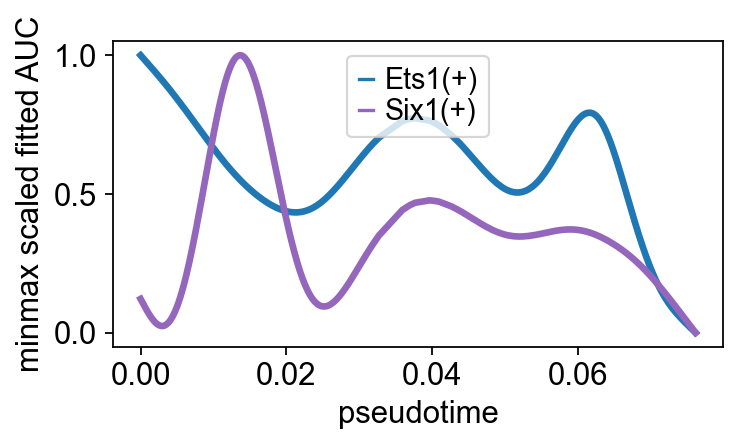

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# https://scholarcommons.sc.edu/cgi/viewcontent.cgi?article=5306&context=etd 
# pdf page 98  manuscript page 80

def get_reg(g,adata):
    df = pd.DataFrame({"t":adata.obs.t,
              "fitted":adata[:,g].layers["fitted"].flatten(),
              "expr":adata[:,g].X.flatten(),
             "regulon":g})
    scaler = MinMaxScaler()
    scaler.fit(df.fitted.values.reshape(-1, 1))
    df["norm"]=scaler.transform(df.fitted.values.reshape(-1, 1))
    return df
    
l=[get_reg(r,adata) for r in ["Ets1(+)","Six1(+)"]]

l=pd.concat(l)

import seaborn as sns
fig, ax = plt.subplots(figsize=(4.5,2.5),constrained_layout=True)
sns.lineplot(data=l,x="t",y="norm",hue="regulon",linewidth=3,palette=[dct_col[0],dct_col[1]],ax=ax)
ax.grid(b=False)
ax.set_xlabel("pseudotime")
ax.set_ylabel("minmax scaled fitted AUC")
ax.legend(labelspacing=0.1)
plt.savefig("figures/Ets1_Six1.png",dpi=600)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union, Iterable

def plot_modules(adata,
                 color: Union[str,None]=None,
                 annot_mil: Iterable = [],
                 kde_kwargs: dict = {},
                 lineplot_kargs: dict = {}):
    fitted=pd.DataFrame(adata.layers["fitted"],index=adata.obs_names,columns=adata.var_names)
    fitted=fitted.apply(lambda x: (x-x.mean())/x.std(),axis=0)
    df_reg=pd.concat(list(map(lambda c: fitted.loc[adata.obs.t.sort_values().index,adata.var.fit_clusters==c].mean(axis=1),adata.var.fit_clusters.unique())),
              keys=adata.var.fit_clusters.unique()).reset_index()
    df_reg.columns=["cluster","cell","activity"]
    for c in df_reg.cluster.unique():
        df_reg.loc[df_reg.cluster==c,'activity']=(df_reg.loc[df_reg.cluster==c,'activity']-df_reg.loc[df_reg.cluster==c,'activity'].min())/(df_reg.loc[df_reg.cluster==c,'activity'].max()-df_reg.loc[df_reg.cluster==c,'activity'].min())
    df_reg["pseudotime"]=[adata.obs.t[c] for c in df_reg.cell]
    
    
    
    

    fig, ax = plt.subplots(1,1,figsize=(10,5),constrained_layout=True)
    if color is not None:
        df=pd.concat(list(map(lambda i:pd.DataFrame({color:adata.obs[color].cat.categories[i],
                     "pseudotime":adata[adata.obs[color]==adata.obs[color].cat.categories[i]].obs.t}),
             range(len(adata.obs[color].cat.categories)))))
        sns.kdeplot(data=df, x="pseudotime", hue=color, multiple="fill",
                   palette=sns.color_palette(adata.uns[color+"_colors"]),
                legend=False,ax=ax,**kde_kwargs)
        ax.set_xlim([0,adata.obs.t.max()])
    sns.lineplot(data=df_reg,x="pseudotime",y="activity",hue="cluster",ax=ax,palette=dct_col,lw=3,
                 **lineplot_kargs)
    plt.grid(b=False)
    
    for m in annot_mil:
        mid=adata.obs.loc[adata.obs["old_milestones"]==m,"t"].mean()
        ax.axvline(mid,linestyle="--",color="k")

        ax.annotate(m, 
                    xy=(mid, 1), 
                    xytext=(mid, 1.02), 
                    horizontalalignment ="left",
                    va="bottom",
                    rotation=45,
                    fontsize=12)
    
    return ax


SS2_15_0073:A21_unique.bam             SCP-Hub
SS2_15_0073:A23_unique.bam             SCP-Hub
SS2_15_0073:B18_unique.bam             SCP-Hub
SS2_15_0073:D16_unique.bam             SCP-Hub
SS2_15_0073:D22_unique.bam             SCP-Hub
                                    ...       
SS2_20_087:J2_unique.bam      Hub-Adrenal<>Gut
SS2_20_087:M20_unique.bam              SCP-Hub
SS2_20_087:N14_unique.bam              SCP-Hub
SS2_20_087:N18_unique.bam              SCP-Hub
SS2_20_089:H15_unique.bam                  Hub
Name: old_milestones, Length: 2110, dtype: category
Categories (7, object): ['late_NCC2', 'Convergence', 'nmSC<>mSC', 'Hub', 'SCP-Hub', 'Hub-Adrenal<>Gut', 'NCC2']

/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pseudotime', ylabel='Density'>

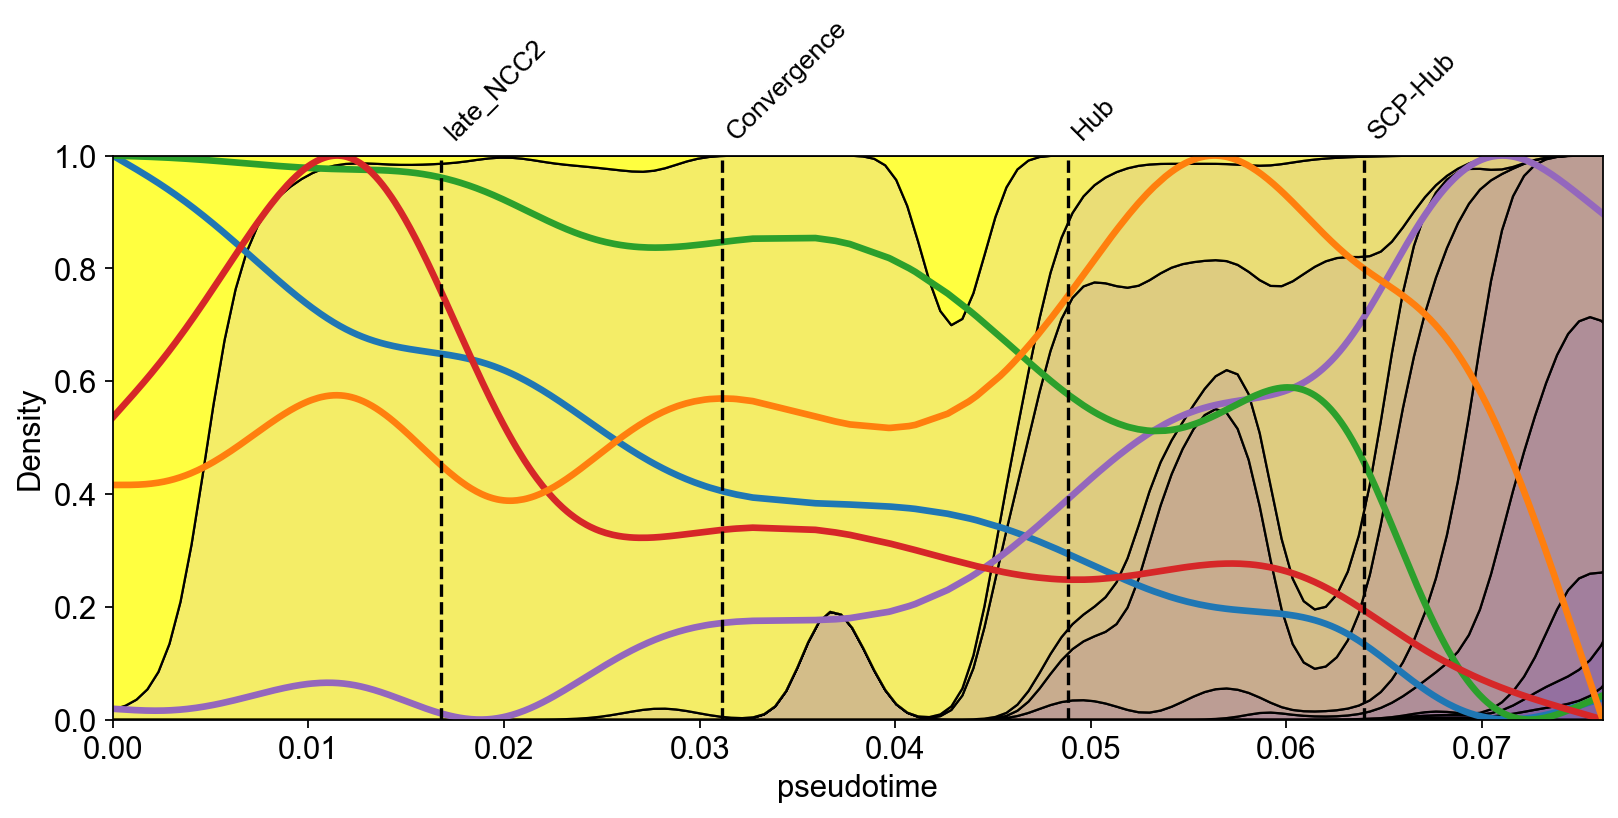

In [80]:
plot_modules(adata,"devtime",annot_mil=['late_NCC2', 'Convergence', 'Hub', 'SCP-Hub'],
            lineplot_kargs=dict(legend=False))

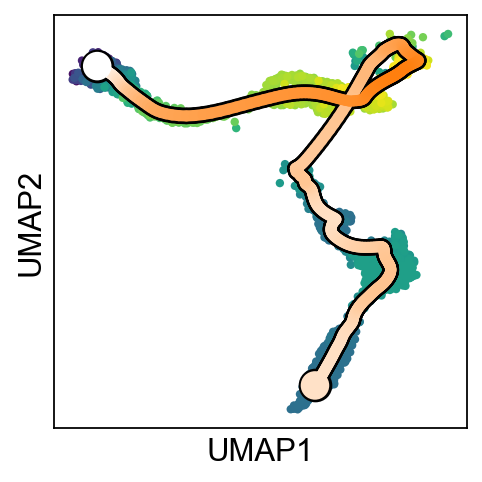

In [86]:
scf.pl.trends(adata,cluster=c,
              cmap=dct_cmap[c],
              feature_cmap=dct_cmap[c],
              plot_heatmap=False,show_segs=True,
              color_cells="mean_trajectory",
              )

/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pseudotime', ylabel='Density'>

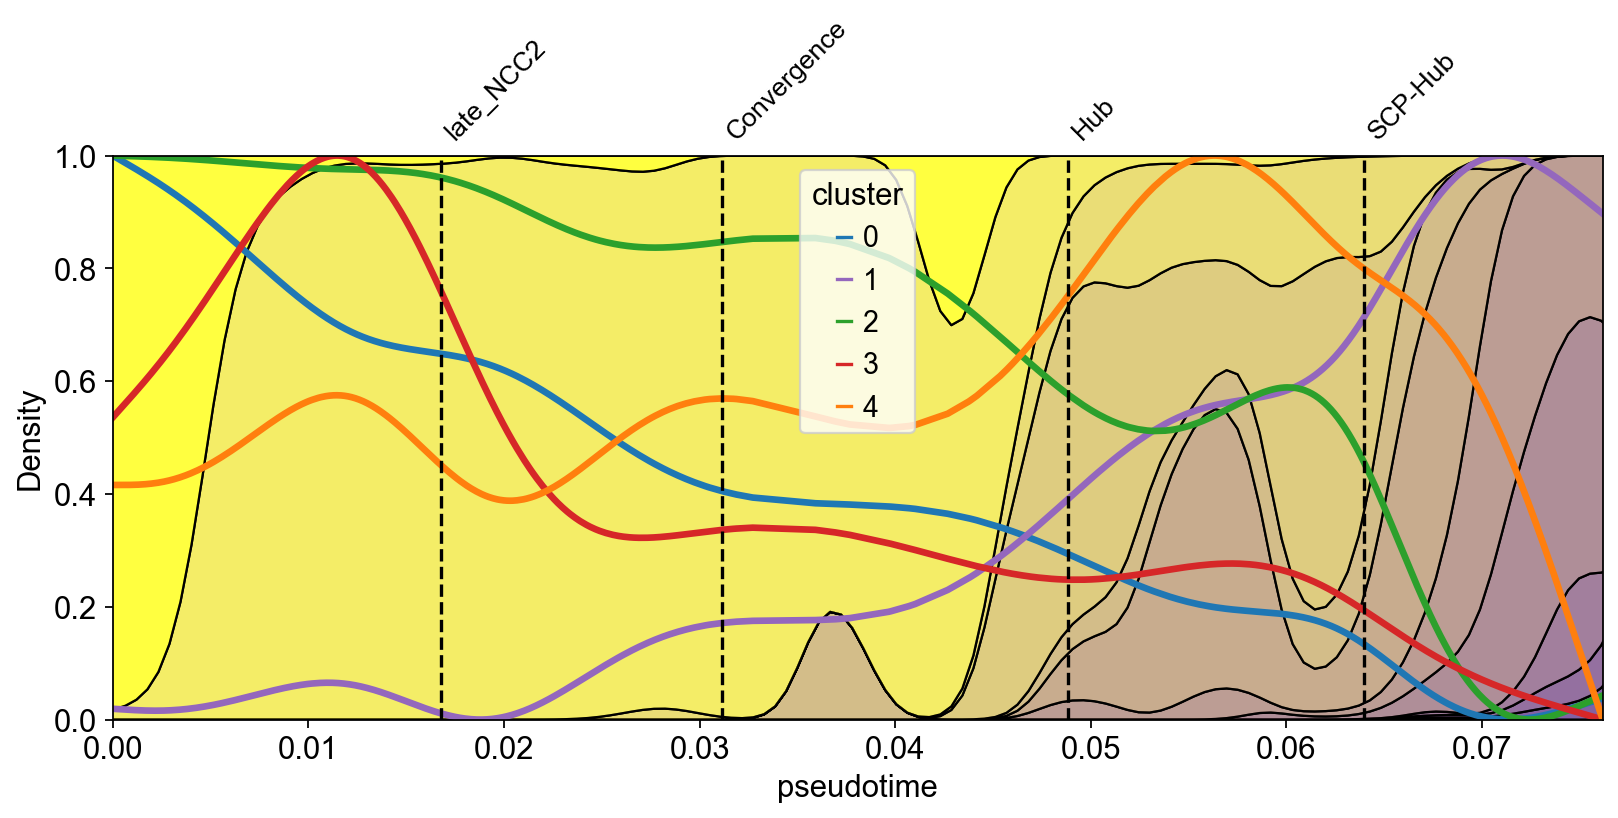

In [81]:
plot_modules(adata,"devtime",annot_mil=['late_NCC2', 'Convergence', 'Hub', 'SCP-Hub'],
            lineplot_kargs=dict(legend=True))

In [86]:
import scFates as scf
import scanpy as sc

In [109]:
adata = sc.read("data/adata_SCtraj_scenic.h5ad")

In [94]:
adata_genes=sc.read("data/adata_processed.h5ad")[adata.obs_names]

In [102]:
adata.write("data/adata_SCtraj_scenic.h5ad")

In [95]:
adata_genes.uns=adata.uns
adata_genes.obsm=adata.obsm
adata_genes.obs=adata.obs

In [96]:
adata=adata_genes

In [97]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 21676/21676 [03:29<00:00, 103.29it/s]
    found 2946 significant features (0:03:30) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [98]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 2946/2946 [00:35<00:00, 82.90it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:39) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [99]:
adata.write("data/adata_SCtraj_genes.h5ad")